### Schlagwortanalyse.ipynb 

Dieses Notebook findet heraus, wie oft und wo das Wort BVG (in den CSV-Dateien "bvg") in den ausgewälten Medien von 2021–2025 vorkommt

#### 1. Import benötigte Pakete

In [54]:
# Standard
import os
import pandas as pd # Datenanalyse
import sqlite3  # Speicherung in SQLite-Datenbanken

# Bearbeiten von HTML-Dateien
from bs4 import BeautifulSoup  # HTML auslesen und bereinigen
from collections import Counter

# Grafik
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# Pfade
DATAPATH = "output/df_medien.csv" # Input-Datei
OUTPUT_FOLDER = os.path.join("..", "output") # Exportordner für Plots, Tabellen

In [45]:
# CSV-Dateien  einlesen
df_medien = pd.read_csv(DATAPATH)

#### 2. Datenexploration

In [ ]:
# Anzahl Zeilen und Spalten
df_medien.shape

(48097645, 5)

In [47]:
# Spaltennamen
df_medien.columns

Index(['count', 'word', 'source', 'date', 'filename'], dtype='object')

In [50]:
# Überblick Datentypen
df_medien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48097645 entries, 0 to 48097644
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   count     int64 
 1   word      object
 2   source    object
 3   date      object
 4   filename  object
dtypes: int64(1), object(4)
memory usage: 1.8+ GB


In [ ]:
# Statistischen Merkmale für numerische Spalten (einschließlich Mittelwert, Median, Min-/Max-Werte und Standardabweichung erzeugen
df_medien.describe()

,count
count,4.809764e+07
mean,1.540577e+00
std,3.000133e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,2.470000e+02


In [9]:
# Prüfung fehlende Werte
df_medien.isnull().sum()

count          0
word        1951
source         0
date           0
filename       0
dtype: int64

In [10]:
# Anzahl fehlende Werte nach Medium
df_medien[df_medien["word"].isnull()]["source"].value_counts()

source
sz              274
zeit            187
boerse          183
ntv             182
heise           148
welt            120
stern           110
tagesspiegel     92
spiegel          85
taz              84
berliner         80
faz              78
mm               71
wiwo             60
dlf              51
netzpolitik      44
handelsblatt     41
tagesschau       31
abendblatt       18
dw-de             8
pioneer           4
Name: count, dtype: int64

In [ ]:
# Beispiel für fehlende Werte
df_medien[df_medien["word"].isnull()].sample(5)

,count,word,source,date,filename
3182343,2,NaN,handelsblatt,2021-05-12,2021-05-12-handelsblatt.html
37541021,1,NaN,ntv,2021-06-24,2021-06-24-ntv.html
43603536,1,NaN,heise,2021-12-25,2021-12-25-heise.html
5195812,1,NaN,boerse,2022-04-06,2022-04-06-boerse.html
14470799,1,NaN,sz,2021-11-25,2021-11-25-sz.html


In [ ]:
# Aus welcher Datei entstehen fehlende Wörter zeigen
df_medien[df_medien["word"].isnull()]["filename"].value_counts()

filename
2023-05-23-sz.html             2
2024-11-24-zeit.html           2
2024-11-25-zeit.html           2
2022-05-23-berliner.html       2
2023-01-21-berliner.html       2
                              ..
2024-12-30-netzpolitik.html    1
2024-12-31-netzpolitik.html    1
2025-01-01-netzpolitik.html    1
2025-01-02-netzpolitik.html    1
2024-12-19-netzpolitik.html    1
Name: count, Length: 1945, dtype: int64

In [ ]:
# Ausgewählte Dateien für die Prüfung definieren
dateien = [
    "2023-05-23-sz.html",
    "2024-11-24-zeit.html",
    "2022-05-23-berliner.html",
    "2024-11-26-tagesspiegel.html",
    "2021-06-07-dlf.html "
]

In [ ]:
# Funktion für die Sichtung von ausgewählten Dateien mit fehlenden Werten
for fname in dateien:
    pfad = os.path.join("..","input", "raw", "data-lake", fname)
    print(f"\n{fname}")

    try:
        with open(pfad, "r", encoding="utf-8") as f:
            html = f.read()
        soup = BeautifulSoup(html, "html.parser")
        text = soup.get_text(separator=" ").lower()
        print(text[:500])  # oder [:1000] für mehr Inhalt
    except Exception as e:
        print(f"Fehler: {e}")


2023-05-23-sz.html

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 aktuelle nachrichten und kommentare - sz.de 
 
 
 zum hauptinhalt springen sz.de zeitung magazin jetzt alle sz-produkte  login menü menü suchen süddeutsche zeitung abos login menü menü suchen süddeutsche zeitung meine sz sz plus ukraine türkei politik wirtschaft meinung panorama sport münchen kultur medien bayern reportage gesellschaft stil wissen karriere gesundheit bildung reise auto mehr 
 
 
 krise am bau : so kaputt ist der wohnungsmarkt eine niederlage in za

2024-11-24-zeit.html

 
 
 
 
 zeit online | nachrichten, news, hintergründe und debatten 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
   
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 zum inhalt springen 
 
 lesezeichen   
 
 
 
 
 
 
 
 
 menü 
 
 
 
 
 
 
 
 suchen 
 
 
 suche 
 
 
   
 
 
 
 
 startseite 
   
 
 
 
 
   exklusive a

In [ ]:
# Fehlende Werte löschen, weil sie keine Infos enthalten
df_medien = df_medien[df_medien["word"].notna()]

#### 3. Schlagwortanalyse

In [53]:
# Neuer DataFrame für Filter
# 1. Exakte Nennungen der Begriffe BVG, MVG, HVV in den ausgewählten Medien

# Filter exakte Begriffe
treffer = df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]

# Absolute Häufigkeiten
wert_counts = treffer["word"].value_counts()

# in % 
wert_prozent = wert_counts / wert_counts.sum() * 100

# Ergebnis anzeigen
print("Exakte Treffer BVG, MVG, HVV:")
print(df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]["word"].value_counts())
print("Anteil der Begriffe BVG, MVG, HVV in %:")
print(wert_prozent.round(2)) # mit 2 Dezimalstellen

Exakte Treffer BVG, MVG, HVV:
word
bvg    1362
hvv     564
mvg     125
Name: count, dtype: int64
Anteil der Begriffe BVG, MVG, HVV in %:
word
bvg    66.41
hvv    27.50
mvg     6.09
Name: count, dtype: float64


In [ ]:
# 2. Wortformen, die BVG, MVG oder HVV beinhalten
df_oepnv = df_medien[df_medien["word"].str.contains("bvg|mvg|hvv", na=False)]
print("Häufigkeit der Begriffe BVG, MVG, HVV:")
print(df_oepnv["word"].value_counts())

Häufigkeit der Begriffe BVG, MVG, HVV:
word
bvg                  1362
hvv                   564
bvg:                  219
mvg                   125
bvg-bus                80
                     ... 
bvg-busknoten.          1
bvg-knoten              1
bvg-wartehäuschen       1
bvg-mitarbeitern.       1
bvg-vorständin          1
Name: count, Length: 276, dtype: int64


In [57]:
# Plot: Darstellung Wordclouds für Wortformen, die BVG, MVG oder HVV beinhalten
# Vorbereitung
# Begriffsliste
begriffsliste = ["bvg", "mvg", "hvv"]

# Farbdefinitionen nach CI der Unternehmen
bvg_color = "#FFD500"   # BVG-Gelb
mvv_color = "#003865"   # MVV-Blau
hvv_color = "#EF3340"   # HVV-Rot

# Dictionary für die Farben
farben = {
    "bvg": bvg_color,
    "mvg": mvv_color,
    "hvv": hvv_color
}

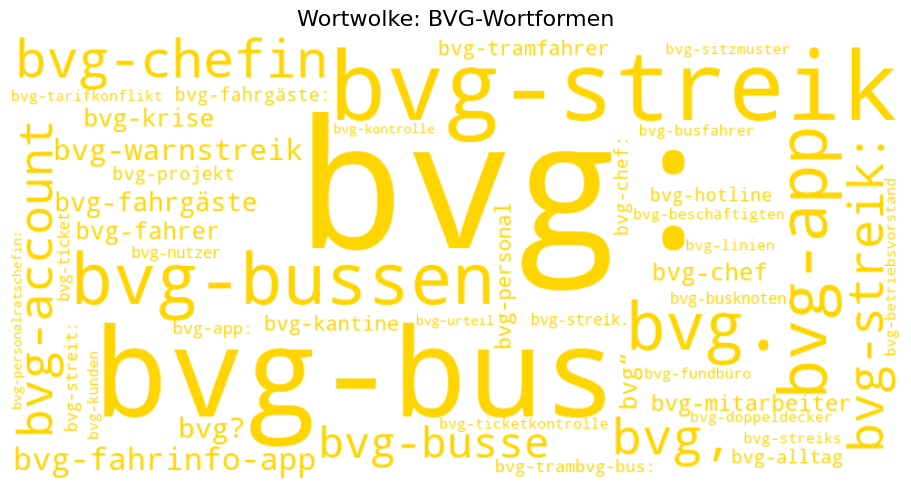

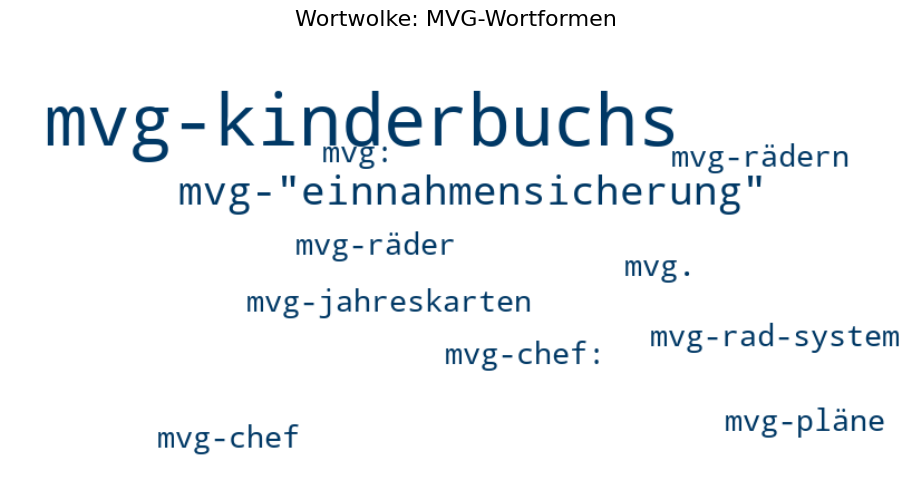

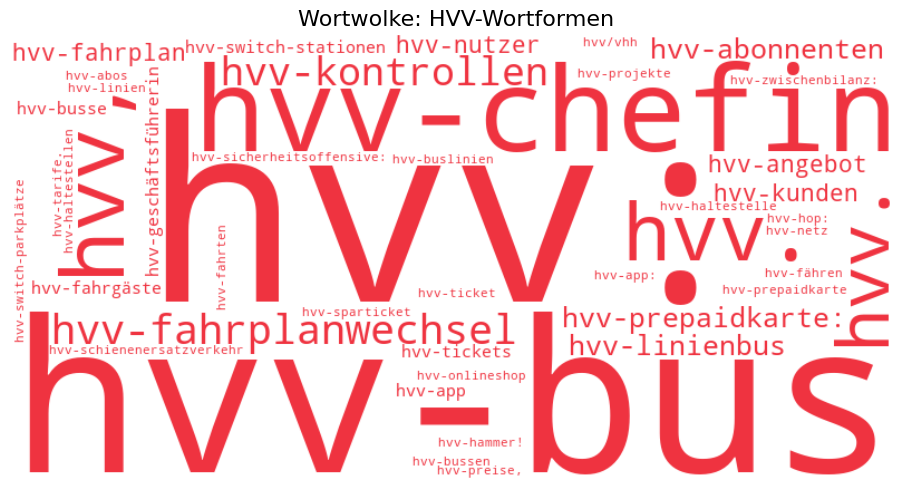

In [ ]:
# Plot: Darstellung Wordclouds für Wortformen, die BVG, MVG oder HVV beginnen
# Wordclouds
# Funktion: xxxx
for begriff in begriffsliste:
    df_wortformen = df_medien[
        (df_medien["word"].str.startswith(begriff, na=False)) & 
        (df_medien["word"] != begriff)
    ]

    # Top 50 Begriffe, die mit BVG, MVG oder HVV beginnen
    wortformen = df_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
    wort_dict = wortformen.to_dict()

    # Farbauswahl über das Dictionary
    farbe = farben.get(begriff, "#000000")  # fallback: schwarz

    # Wordcloud
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        color_func=lambda *args, **kwargs: farbe
    ).generate_from_frequencies(wort_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wortwolke: {begriff.upper()}-Wortformen", fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# 3. Wortanzahl über alle Jahre 
# Jahr aus Datum extrahieren
df_oepnv["date"] = pd.to_datetime(df_oepnv["date"], errors="coerce")
df_oepnv["year"] = df_oepnv["date"].dt.year

# Filter exakte Nennungen der Begriffe
df_oepnv_exact = df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]

# Gruppierung: Anzahl je Jahr und Wort
oepnv_jahre = df_oepnv_exact.groupby(["year", "word"])["count"].sum().unstack().fillna(0).astype(int)

# Ausgabe
print(oepnv_jahre)

C:\Users\Marta\AppData\Local\Temp\ipykernel_7900\618296040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oepnv["date"] = pd.to_datetime(df_oepnv["date"], errors="coerce")
C:\Users\Marta\AppData\Local\Temp\ipykernel_7900\618296040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oepnv["year"] = df_oepnv["date"].dt.year


word  bvg  hvv  mvg
year               
2021  485   35   41
2022  497  407   65
2023  343  165   16
2024  513  165   17
2025  300   35    2


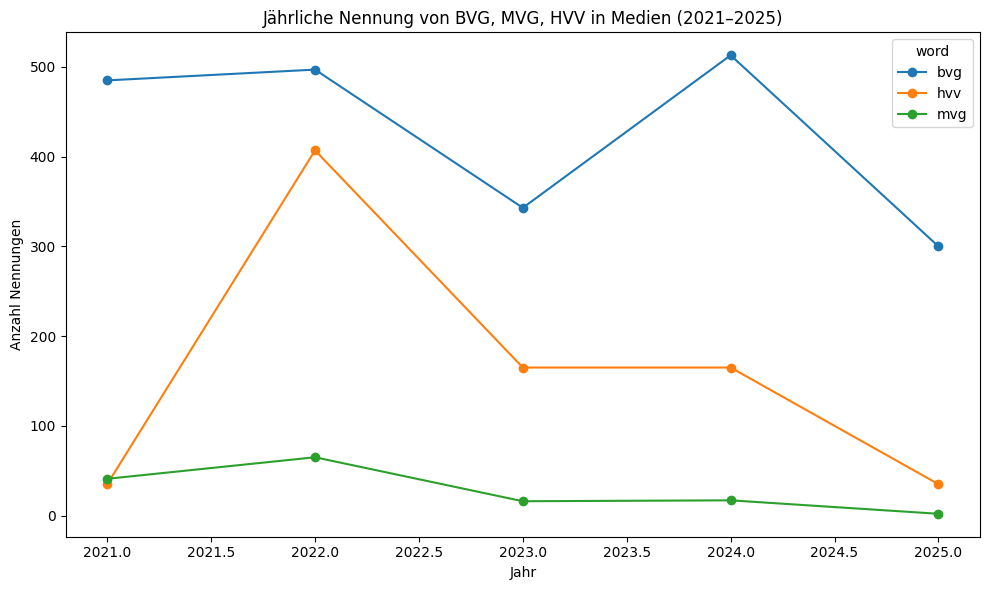

In [ ]:
# Plot: Darstellung jährliche Nennung der Begriffe BVG, MVG, HVV
oepnv_jahre.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Jährliche Nennung von BVG, MVG, HVV in Medien (2021–2025)")
plt.ylabel("Anzahl Nennungen")
plt.xlabel("Jahr")
plt.grid(False)
plt.tight_layout()
plt.show()

In [39]:
# Filter auf exakte Wörter
df_oepnv_exact = df_oepnv[df_oepnv["word"].isin(["bvg", "mvg", "hvv"])]

# Gruppieren: Wortanzahl pro Medium und Begriff
oepnv_quellen = df_oepnv_exact.groupby(["source", "word"])["count"].sum().unstack().fillna(0).astype(int)

# Ausgabe
print(oepnv_quellen.sort_index())

word           bvg  hvv  mvg
source                      
abendblatt       2  796    0
berliner       742    0    0
boerse           0    0  116
dlf              1    0    0
faz              4    0    0
heise            7    0    0
mm               8    0    0
ntv             16    3    1
spiegel          9    0    0
stern            7    2    0
sz               4    1   23
t3n              6    0    0
tagesspiegel  1217    0    0
taz             94    0    0
welt            11    1    1
zeit            10    4    0


In [40]:
oepnv_quellen_percent = oepnv_quellen.div(oepnv_quellen.sum(axis=1), axis=0) * 100
print(oepnv_quellen_percent.round(2))

word             bvg    hvv     mvg
source                             
abendblatt      0.25  99.75    0.00
berliner      100.00   0.00    0.00
boerse          0.00   0.00  100.00
dlf           100.00   0.00    0.00
faz           100.00   0.00    0.00
heise         100.00   0.00    0.00
mm            100.00   0.00    0.00
ntv            80.00  15.00    5.00
spiegel       100.00   0.00    0.00
stern          77.78  22.22    0.00
sz             14.29   3.57   82.14
t3n           100.00   0.00    0.00
tagesspiegel  100.00   0.00    0.00
taz           100.00   0.00    0.00
welt           84.62   7.69    7.69
zeit           71.43  28.57    0.00


In [41]:
# Sicherstellen, dass nur exakte Begriffe verwendet werden
df_bvg_words = df_oepnv[df_oepnv["word"] == "bvg"]
df_mvg_words = df_oepnv[df_oepnv["word"] == "mvg"]
df_hvv_words = df_oepnv[df_oepnv["word"] == "hvv"]

# Schritt 1: alle Zeilen mit BVG-Umfeld extrahieren
# Diese Zeilen enthalten nicht das Wort "bvg", sondern stammen aus denselben Artikeln wie "bvg"
# Dafür: alle Artikel identifizieren, in denen "bvg" vorkommt
artikel_bvg = df_bvg_words["filename"].unique()
df_context_bvg = df_medien[df_medien["filename"].isin(artikel_bvg)]

# Dasselbe für MVG und HVV
artikel_mvg = df_mvg_words["filename"].unique()
df_context_mvg = df_medien[df_medien["filename"].isin(artikel_mvg)]

artikel_hvv = df_hvv_words["filename"].unique()
df_context_hvv = df_medien[df_medien["filename"].isin(artikel_hvv)]

# Top-Wörter berechnen
top_bvg_words = df_context_bvg.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
top_mvg_words = df_context_mvg.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
top_hvv_words = df_context_hvv.groupby("word")["count"].sum().sort_values(ascending=False).head(50)

# Ausgabe
print("Top-Wörter im Umfeld von BVG:")
print(top_bvg_words)

print("\nTop-Wörter im Umfeld von MVG:")
print(top_mvg_words)

print("\nTop-Wörter im Umfeld von HVV:")
print(top_hvv_words)

Top-Wörter im Umfeld von BVG:
word
berlin          45255
tagesspiegel    27966
:               27549
berliner        26244
plus            21221
politik          9369
news             8677
deutschland      8379
ukraine          8281
wirtschaft       7774
panorama         7400
kultur           7148
abspielen        6929
 kommentare      6452
union            6178
bezirke          5749
menschen         5667
gesundheit       5562
berlin:          5467
1.               5228
aktuelle         5144
gutscheine       4924
polizei          4779
std.             4572
fc               4521
sport            4481
checkpoint       4272
große            4254
open             4070
berlins          4069
newsletter       4046
deutsche         4014
verkehr          3948
jahren           3908
leben            3849
russland         3819
meinung          3768
krieg            3657
wissen           3636
hertha           3634
source           3550
min              3527
usa              3487
euro             34

In [42]:
# Nur Wörter, die mit "bvg" beginnen
bvg_wortformen = df_medien[df_medien["word"].str.startswith("bvg", na=False)]
bvg_wortformen = bvg_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
print("Top-Wortformen mit 'bvg':")
print(bvg_wortformen)

# Nur Wörter, die mit "mvg" beginnen
mvg_wortformen = df_medien[df_medien["word"].str.startswith("mvg", na=False)]
mvg_wortformen = mvg_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
print("\nTop-Wortformen mit 'mvg':")
print(mvg_wortformen)

# Nur Wörter, die mit "hvv" beginnen
hvv_wortformen = df_medien[df_medien["word"].str.startswith("hvv", na=False)]
hvv_wortformen = hvv_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(50)
print("\nTop-Wortformen mit 'hvv':")
print(hvv_wortformen)

Top-Wortformen mit 'bvg':
word
bvg                        2138
bvg:                        265
bvg-bus                     102
bvg-streik                   92
bvg-bussen                   82
bvg-app                      72
bvg.                         72
bvg-chefin                   42
bvg,                         38
bvg-streik:                  37
bvg-account                  36
bvg-busse                    28
bvg-fahrinfo-app             26
bvg-warnstreik               24
bvg?                         22
bvg-fahrgäste                18
bvg-krise                    17
bvg-chef                     15
bvg-fahrer                   15
bvg“                         15
bvg-mitarbeiter              13
bvg-personal                 12
bvg-tramfahrer               11
bvg-kantine                  11
bvg-alltag                   10
bvg-fahrgäste:                9
bvg-chef:                     9
bvg-projekt                   9
bvg-hotline                   9
bvg-streit:                   8
bvg-tram 

In [ ]:
pivot = df_bvg.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
pivot.head()

source,abendblatt,berliner,dlf,faz,handelsblatt,heise,mm,netzpolitik,ntv,spiegel,stern,sz,t3n,tagesschau,tagesspiegel,taz,welt,wiwo,zeit
year,,,,,,,,,,,,,,,,,,,
2021,0,115,5,1,2,2,0,0,0,0,3,0,0,0,497,7,0,13,1
2022,0,181,0,3,0,0,0,0,2,5,1,0,0,0,493,14,1,0,1
2023,2,359,0,0,0,3,9,0,2,0,2,2,6,0,187,31,1,0,5
2024,0,580,1,1,0,6,1,115,5,2,2,2,0,0,289,43,5,0,4
2025,0,210,0,0,0,2,0,0,9,1,2,2,0,1,105,16,6,0,3


In [24]:
# Sicherstellen, dass Datum und Jahr vorhanden sind
df_medien["date"] = pd.to_datetime(df_medien["date"], errors="coerce")
df_medien["year"] = df_medien["date"].dt.year

# Filter für exakte Begriffe
df_bvg = df_medien[df_medien["word"] == "bvg"]
df_mvg = df_medien[df_medien["word"] == "mvg"]
df_hvv = df_medien[df_medien["word"] == "hvv"]

# Pivot-Tabellen erstellen
pivot_bvg = df_bvg.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
pivot_mvg = df_mvg.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)
pivot_hvv = df_hvv.pivot_table(index="year", columns="source", values="count", aggfunc="sum", fill_value=0)

# Ausgabe – optional nur erste 5 Zeilen
print("BVG – Pivot-Tabelle:")
print(pivot_bvg.head())

print("\nMVG – Pivot-Tabelle:")
print(pivot_mvg.head())

print("\nHVV – Pivot-Tabelle:")
print(pivot_hvv.head())

BVG – Pivot-Tabelle:
source  abendblatt  berliner  faz  heise  mm  ntv  spiegel  stern  sz  t3n  \
year                                                                         
2021             0        70    0      1   0    0        0      3   0    0   
2022             0        69    2      0   0    1        5      1   0    0   
2023             2       160    0      1   8    0        0      0   1    6   
2024             0       288    0      3   0    4        2      2   2    0   
2025             0        84    0      2   0    8        1      1   1    0   

source  tagesspiegel  taz  welt  zeit  
year                                   
2021             404    7     0     0  
2022             410    7     1     1  
2023             138   27     0     0  
2024             174   31     5     2  
2025              55    8     5     2  

MVG – Pivot-Tabelle:
source  boerse  ntv  sz  welt
year                         
2021        37    0   3     1
2022        60    0   5     0
2023      

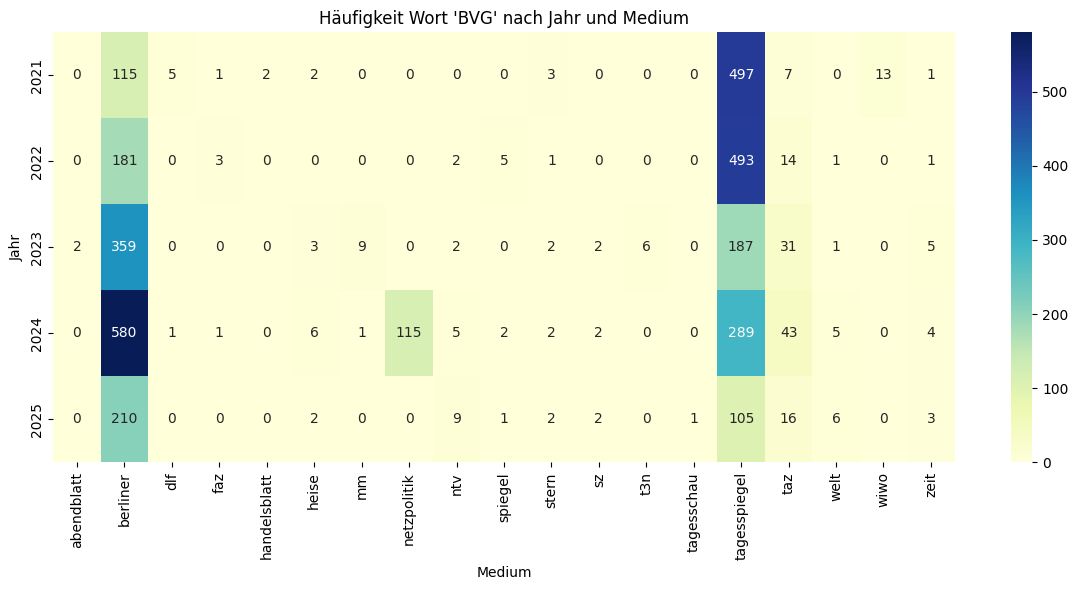

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Häufigkeit Wort 'BVG' nach Jahr und Medium")
plt.xlabel("Medium")
plt.ylabel("Jahr")
plt.tight_layout()
plt.show()

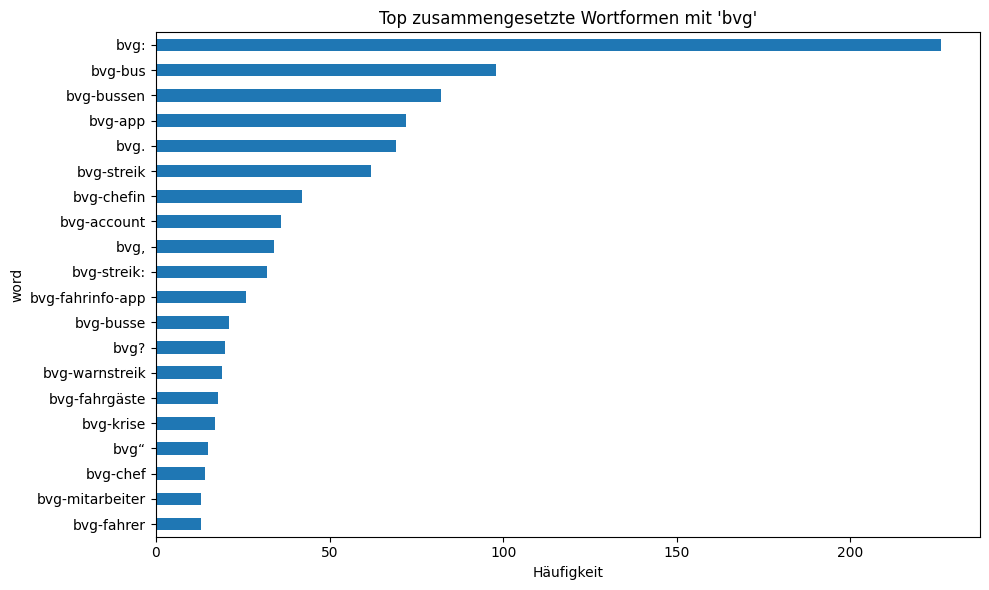

In [25]:
# Nur zusammengesetzte BVG-Wörter (nicht "bvg" allein)
bvg_zusammengesetzt = df_medien[
    (df_medien["word"].str.startswith("bvg", na=False)) &
    (df_medien["word"] != "bvg")
]

# Gruppieren und sortieren
top_bvg_wortformen = bvg_zusammengesetzt.groupby("word")["count"].sum().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_bvg_wortformen.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top zusammengesetzte Wortformen mit 'bvg'")
plt.xlabel("Häufigkeit")
plt.tight_layout()
plt.show()

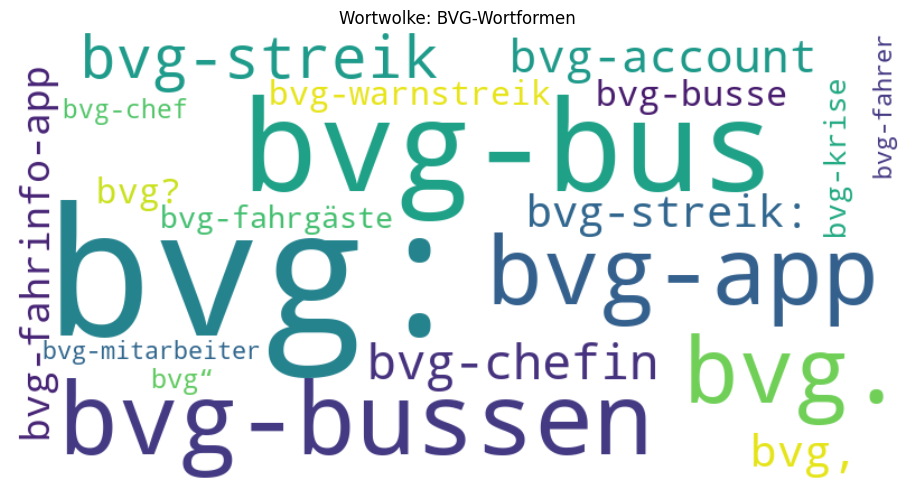

In [26]:
from wordcloud import WordCloud

# Wörter und Häufigkeiten als Dictionary
bvg_dict = top_bvg_wortformen.to_dict()

# Wortwolke erstellen
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(bvg_dict)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wortwolke: BVG-Wortformen")
plt.tight_layout()
plt.show()

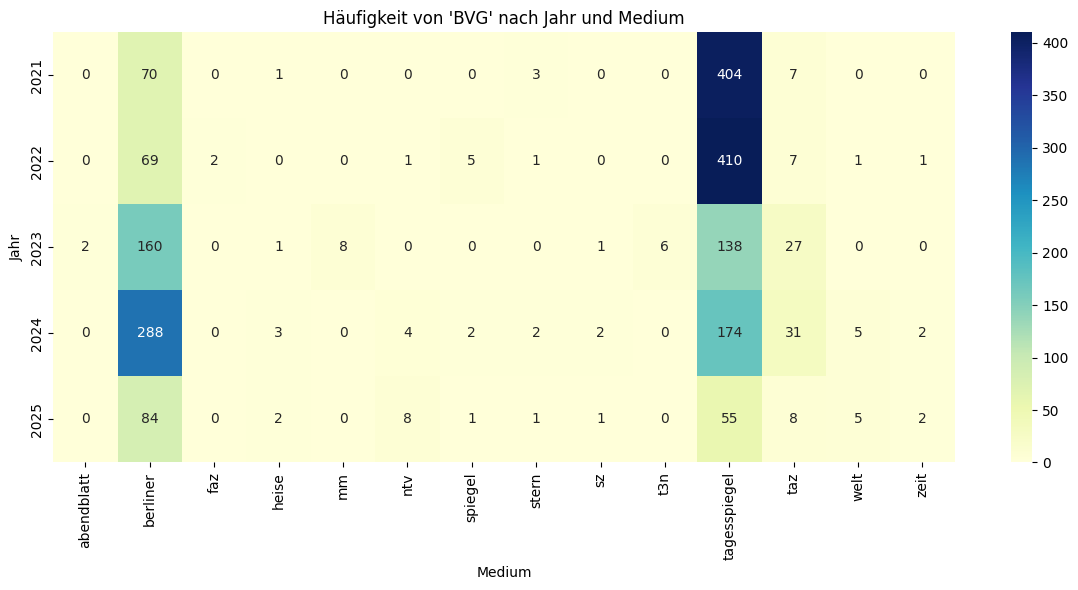

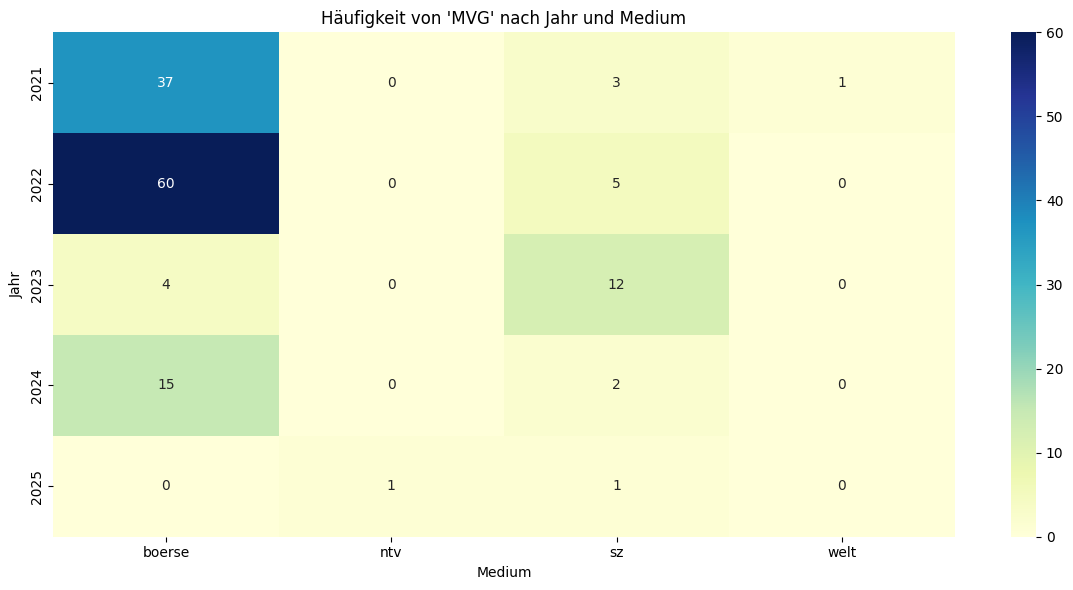

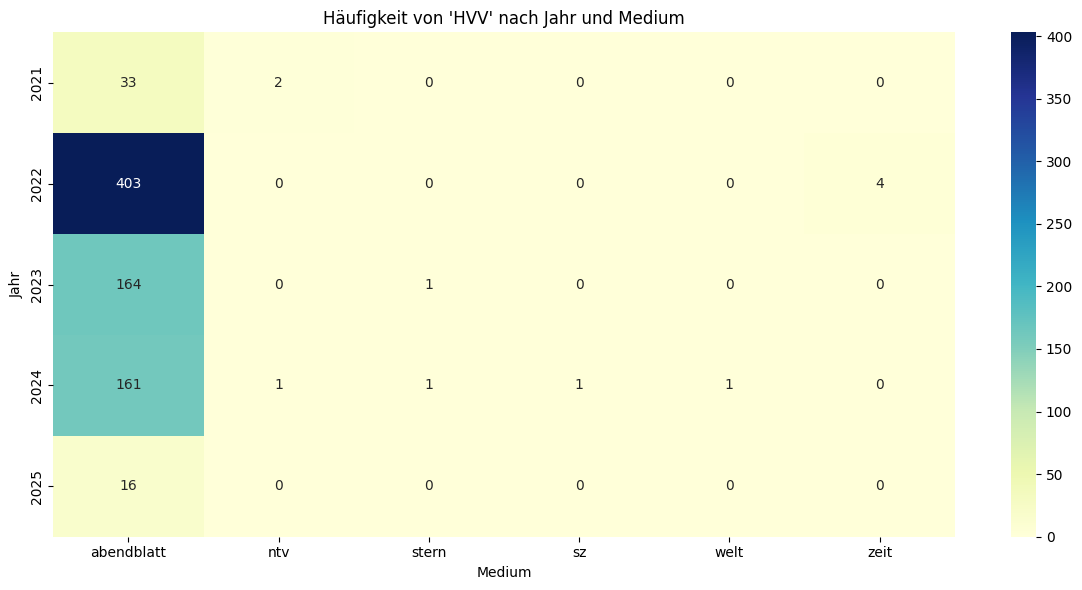

In [27]:

# Sicherstellen, dass das Jahr korrekt gesetzt ist
df_medien["date"] = pd.to_datetime(df_medien["date"], errors="coerce")
df_medien["year"] = df_medien["date"].dt.year

# Begriffe, die wir analysieren wollen
begriffe = ["bvg", "mvg", "hvv"]

# Schleife über jeden Begriff
for wort in begriffe:
    df_temp = df_medien[df_medien["word"] == wort]

    pivot = df_temp.pivot_table(
        index="year",
        columns="source",
        values="count",
        aggfunc="sum",
        fill_value=0
    )

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f"Häufigkeit von '{wort.upper()}' nach Jahr und Medium")
    plt.xlabel("Medium")
    plt.ylabel("Jahr")
    plt.tight_layout()
    plt.show()

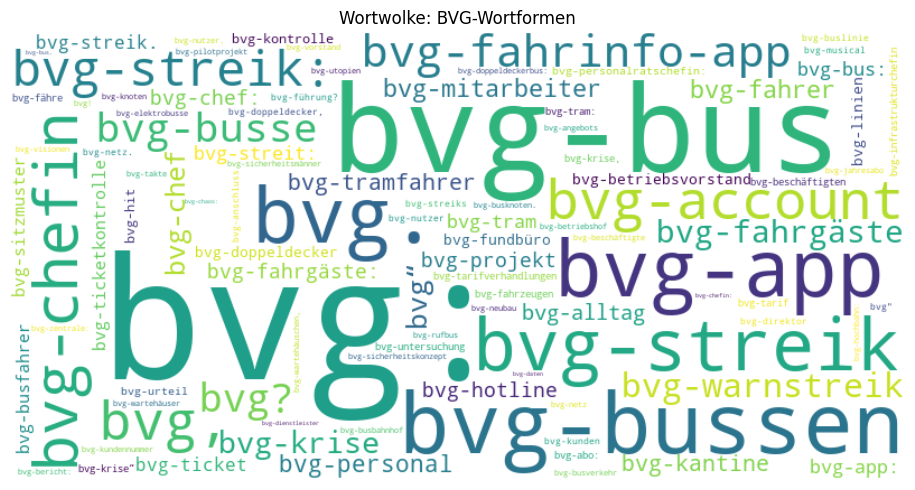

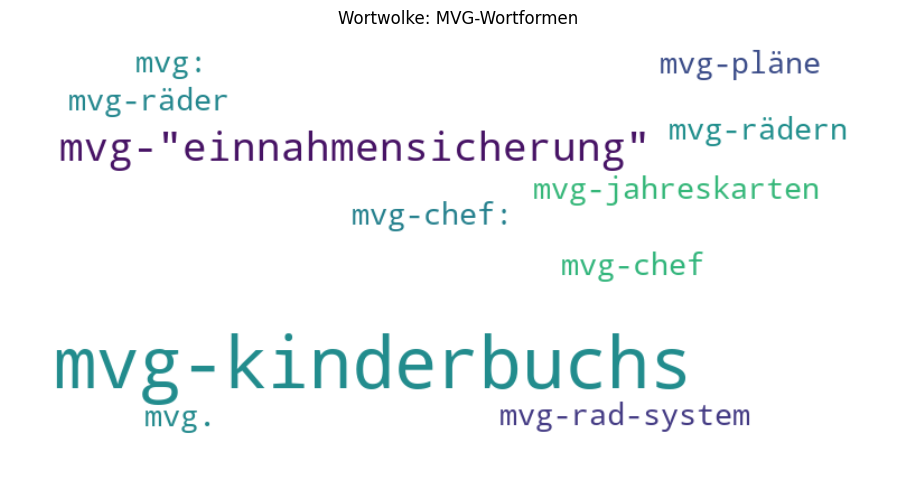

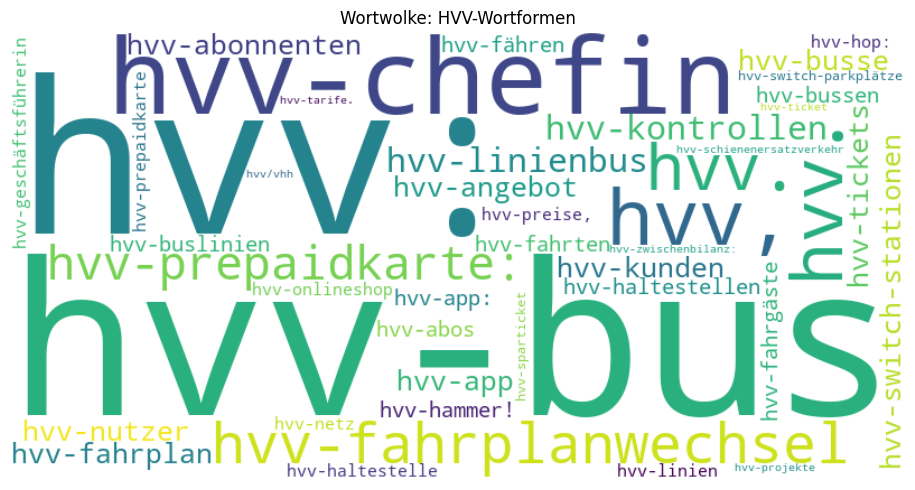

In [28]:

begriffsliste = ["bvg", "mvg", "hvv"]

for begriff in begriffsliste:
    df_wortformen = df_medien[
        (df_medien["word"].str.startswith(begriff, na=False)) &
        (df_medien["word"] != begriff)
    ]

    wortformen = df_wortformen.groupby("word")["count"].sum().sort_values(ascending=False).head(100)
    wort_dict = wortformen.to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(wort_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wortwolke: {begriff.upper()}-Wortformen")
    plt.tight_layout()
    plt.show()

In [ ]:
df_medien["cluster"] = df_medien["source"].map(cluster_map)

In [ ]:
df_medien[["source", "cluster"]].drop_duplicates().cluster.value_counts()

In [ ]:
# Erstellung Dictionary für Analyse nach Clustern
cluster_map = {
    # Öffentlich-rechtlich
    "dlf": "Öffentlich-rechtlich",
    "tagesschau": "Öffentlich-rechtlich",

    # Wirtschaftsmedien
    "handelsblatt": "Wirtschaft",
    "wiwo": "Wirtschaft",
    "mm": "Wirtschaft",
    "boerse": "Wirtschaft",

    # Große Medien
    "sz": "Große Medien",
    "zeit": "Große Medien",
    "faz": "Große Medien",
    "taz": "Große Medien",
    "welt": "Große Medien",
    "spiegel": "Große Medien",
    "stern": "Große Medien",

    # Regionale Medien
    "abendblatt": "Regional",
    "berliner": "Regional",
    "tagesspiegel": "Regional",

    # Digitale Nachrichtenportale
    "ntv": "Digital",
    "pioneer": "Digital",
    "dw-de": "Digital",

    # Technologie
    "heise": "Technologie",
    "golem": "Technologie",
    "netzpolitik": "Technologie",
    "t3n": "Technologie"
}